## タイトル

In [6]:
#■このPythonスクリプトについて
#　RapidMiner社が提供する分析用のサンプルデータのうち、顧客離反率データを
#　選んで分析したもの。
#
#■分析結果サマリー（結果詳細はスクリプト中に記載）
#
#■分析の進め方
#　ステップ１：データを可視化する
#　ステップ２：可視化したデータから仮説を立てる
#　ステップ３：データを整形する
#　ステップ４：データを分析する

### ステップ１：データを可視化する

In [7]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 分析用データ（エクセル）をデータフレームに読み込む
churn_excel = './customer-churn-data.xlsx'
df = pd.read_excel(churn_excel)

In [9]:
# データの概要（プロパティ）を把握する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
Gender             996 non-null object
Age                996 non-null int64
Payment Method     996 non-null object
Churn              900 non-null object
LastTransaction    996 non-null int64
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [ ]:
# データ構造の特徴
#　・行数が996、列数が5なのでデータの規模は大きくない
#　・Churn列に欠損値が96件ある

In [21]:
df.head()

Gender  Age Payment Method  Churn  LastTransaction
0    male   64    credit card  loyal               98
1    male   35         cheque  churn              118
2  female   25    credit card  loyal              107
3  female   39    credit card    NaN              177
4    male   39    credit card  loyal               90

In [22]:
df.describe()

Age  LastTransaction
count  996.000000       996.000000
mean    45.616466       111.072289
std     18.776749        44.956045
min     17.000000         1.000000
25%     30.000000        77.000000
50%     44.000000       110.000000
75%     58.000000       145.000000
max     91.000000       223.000000

In [23]:
df.dtypes

Gender             object
Age                 int64
Payment Method     object
Churn              object
LastTransaction     int64
dtype: object

In [24]:
# 文字型の統計量
df[['Gender','Payment Method', 'Churn']].describe()

Gender Payment Method  Churn
count     996            996    900
unique      2              3      2
top      male    credit card  loyal
freq      548            649    578

In [25]:
# クロス集計
grouped = df.groupby('Churn')
grouped.describe().round(1)

Age                                           LastTransaction         \
       count  mean   std   min   25%   50%   75%   max           count   mean   
Churn                                                                           
churn  322.0  50.1  17.9  17.0  37.0  49.0  64.0  89.0           322.0  129.8   
loyal  578.0  43.0  18.9  17.0  27.0  41.0  55.0  91.0           578.0  100.4   

                                              
        std  min    25%    50%    75%    max  
Churn                                         
churn  44.5  3.0  106.2  134.0  162.0  223.0  
loyal  41.5  1.0   70.2   98.0  127.8  208.0

In [26]:
grouped_mlt = df.groupby(['Churn','Gender'])
grouped_mlt.describe().round(1)

Age                                           LastTransaction  \
              count  mean   std   min   25%   50%   75%   max           count   
Churn Gender                                                                    
churn female  268.0  49.5  17.8  17.0  37.0  48.5  63.0  89.0           268.0   
      male     54.0  53.4  18.1  21.0  37.2  54.5  67.8  89.0            54.0   
loyal female  139.0  36.6  18.6  17.0  22.0  29.0  49.5  91.0           139.0   
      male    439.0  45.1  18.6  17.0  30.0  43.0  56.0  91.0           439.0   

                                                             
               mean   std   min    25%    50%    75%    max  
Churn Gender                                                 
churn female  131.2  44.7   3.0  107.0  135.5  164.2  223.0  
      male    123.0  43.7  23.0   97.2  131.0  155.8  196.0  
loyal female  101.8  45.4  21.0   68.0   96.0  140.0  203.0  
      male    100.0  40.2   1.0   72.0   98.0  126.0  208.0

In [28]:
# 折れ線グラフ
ax = df.plot(secondary_y=['LastTransaction'])
ax.set_title('Age')
ax.right_ax.set_ylabel('Transaction')
plt.show()

In [29]:
# 散布図
ax = df.plot.scatter(x='age', y='transaction')
ax.set_title('Scatter')
plt.show()

KeyError: 'age'

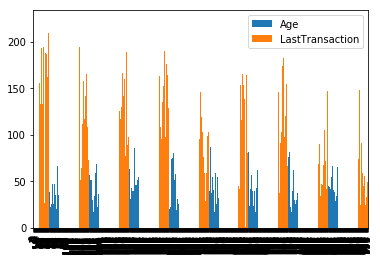

In [30]:
# 棒グラフ
ax = df.plot.bar()
plt.show()

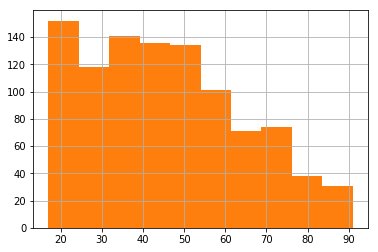

In [32]:
# ヒストグラム
ax = df['Age'].hist(bins=10)
plt.show()

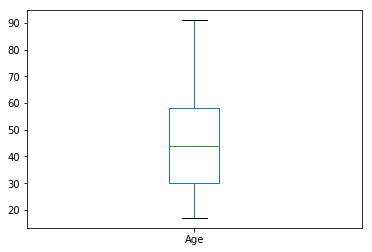

In [33]:
ax = df['Age'].plot.box()
plt.show()

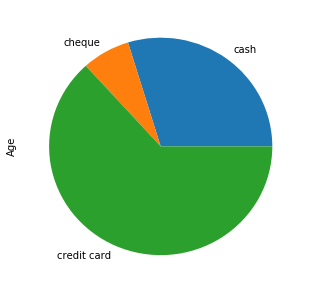

In [36]:
# 円グラフ
ax = df.groupby('Payment Method').sum()['Age'].plot.pie(figsize=(5,5))
plt.show()

In [2]:
# カテゴリごとに棒グラフを作成する。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_excel = './customer-churn-data.xlsx'
df = pd.read_excel(churn_excel)
df['Gender'].head()

0      male
1      male
2    female
3    female
4      male
Name: Gender, dtype: object

In [3]:
df['Gender'].shape

(996,)

In [4]:
df.columns

Index(['Gender', 'Age', 'Payment Method', 'Churn', 'LastTransaction'], dtype='object')

In [9]:
df.dtypes

Gender             object
Age                 int64
Payment Method     object
Churn              object
LastTransaction     int64
dtype: object

In [6]:
# あるカテゴリ列に入っている種類名を求める
df['Gender'].value_counts().index

Index(['male', 'female'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 5 columns):
Gender             996 non-null object
Age                996 non-null int64
Payment Method     996 non-null object
Churn              900 non-null object
LastTransaction    996 non-null int64
dtypes: int64(2), object(3)
memory usage: 39.0+ KB


In [11]:
df['Payment Method'].value_counts().index

Index(['credit card', 'cash', 'cheque'], dtype='object')

In [12]:
df['Churn'].value_counts().index

Index(['loyal', 'churn'], dtype='object')

df.head()

In [14]:
df.describe()

Age  LastTransaction
count  996.000000       996.000000
mean    45.616466       111.072289
std     18.776749        44.956045
min     17.000000         1.000000
25%     30.000000        77.000000
50%     44.000000       110.000000
75%     58.000000       145.000000
max     91.000000       223.000000

In [15]:
df[['Gender', 'Payment Method', 'Churn']].describe()

Gender Payment Method  Churn
count     996            996    900
unique      2              3      2
top      male    credit card  loyal
freq      548            649    578

### 説明

# aa